In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.linear_model as skl_lm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, plot_confusion_matrix

In [2]:
train=pd.read_csv('./train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
test=pd.read_csv('./test.csv')
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
train.Sex=(train.Sex=='male')*1 #to encode male as 1 and female as 0
test.Sex=(test.Sex=='male')*1
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
#as there is missing information
train['Embarked'] = train['Embarked'].fillna('0')

combo = [train, test]
for item in combo:
    item['Embarked'] = item['Embarked'].map( {'0':0, 'S': 1, 'C': 2, 'Q': 3} ).astype(int)

In [6]:
train_Age=train['Age']
train['Age'].fillna(train['Age'].median(),inplace=True)
test['Fare'].fillna(test['Fare'].median(), inplace =True)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,2
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,1
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,1


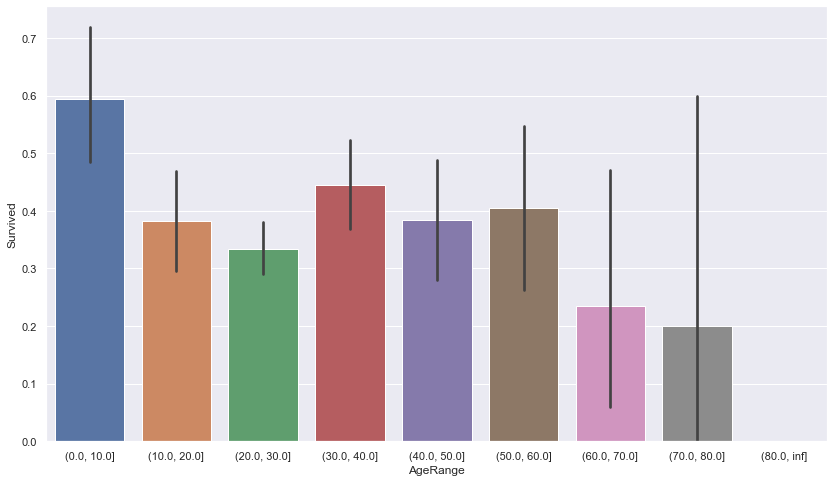

In [7]:

bins = [ 0, 10, 20, 30, 40, 50, 60 ,70, 80,np.inf]
train['AgeRange'] = pd.cut(train["Age"].dropna(), bins)

sns.set()
plt.figure(figsize = (14,8))
sns.barplot(x="AgeRange", y="Survived", data=train)
plt.show()


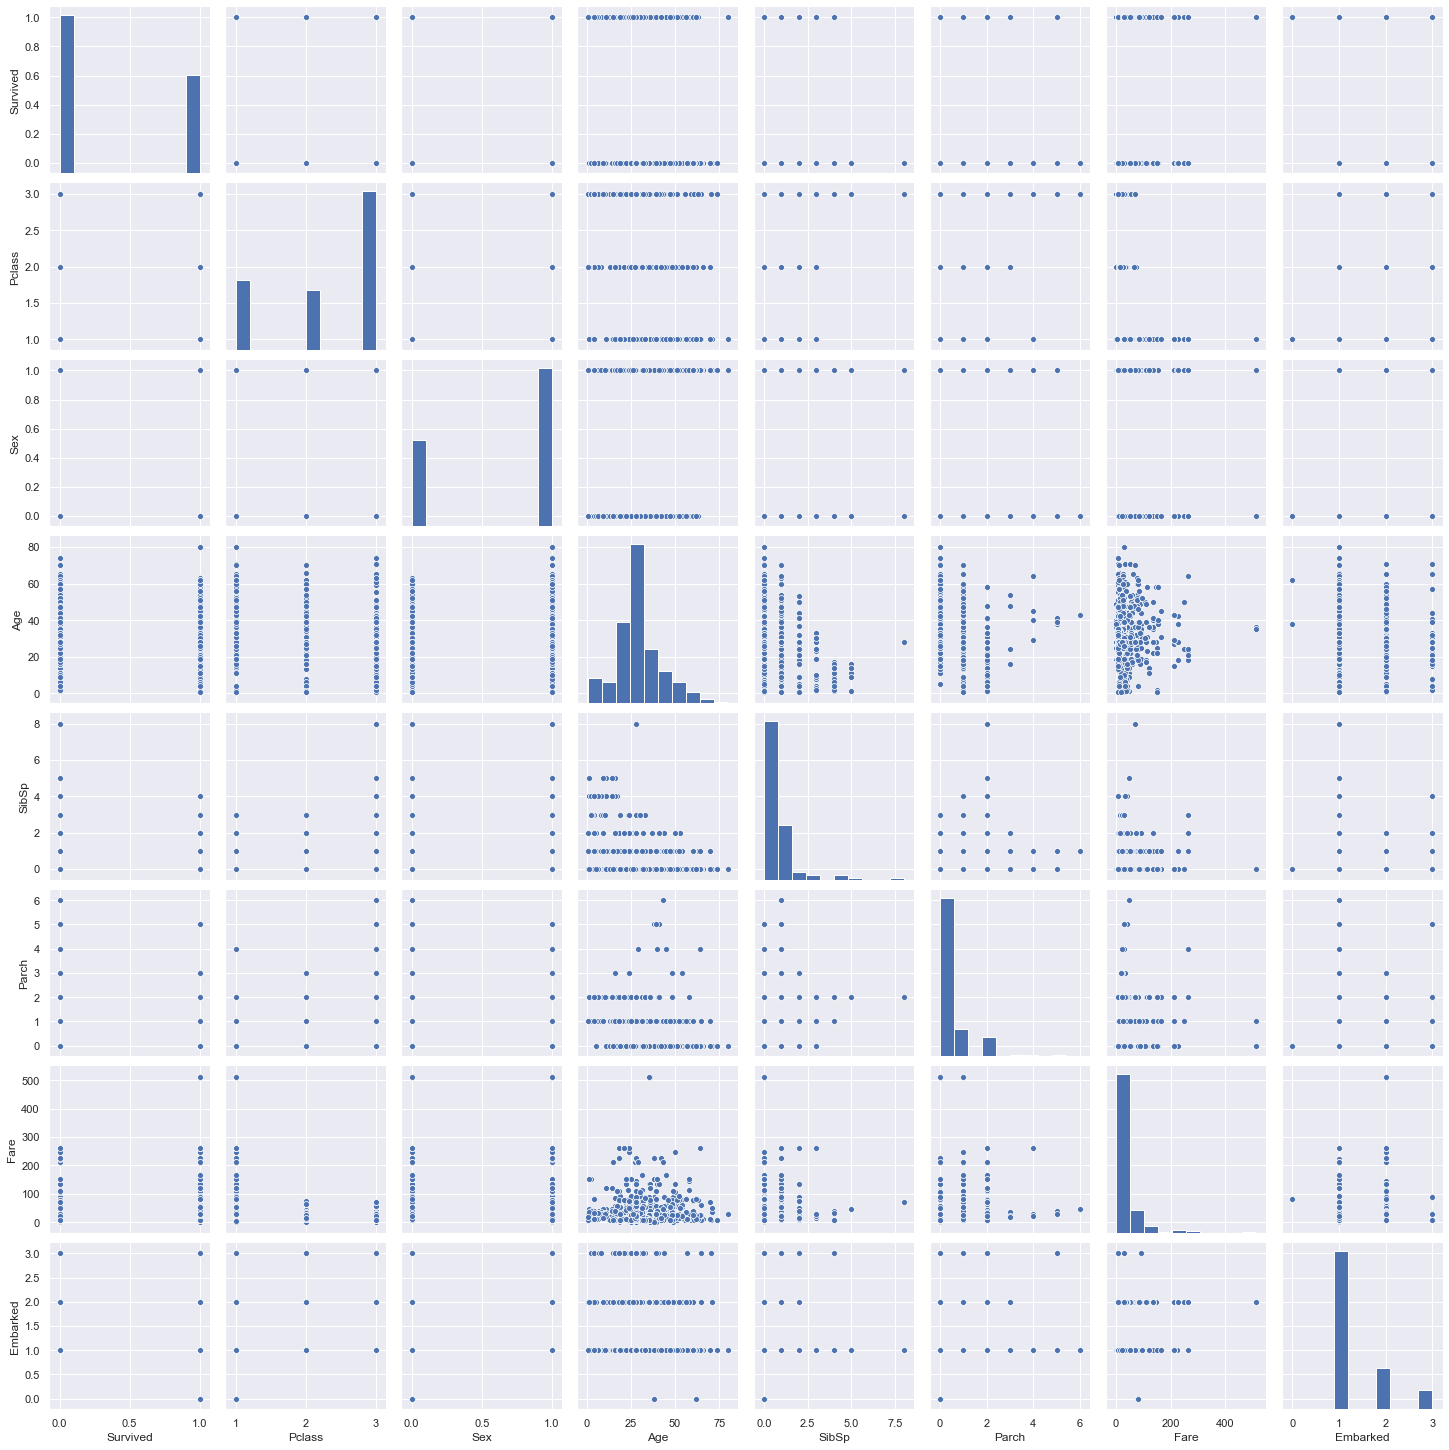

In [8]:
sns.pairplot(train[['Survived','Pclass','Sex','Age','SibSp','Parch','Fare','Cabin','Embarked','Ticket']]);


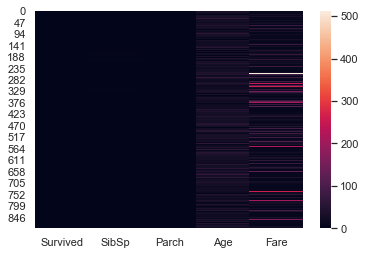

In [9]:
heatmap = sns.heatmap(train[["Survived","SibSp","Parch","Age","Fare"]])

In [10]:
train = train.drop(['Ticket', 'Cabin','Name'], axis=1)
train=train.drop(['AgeRange','PassengerId'],axis=1)
test_id=test['PassengerId']
test = test.drop(['Ticket', 'Cabin','Name','PassengerId'], axis=1)
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,1
1,1,1,0,38.0,1,0,71.2833,2
2,1,3,0,26.0,0,0,7.9250,1
3,1,1,0,35.0,1,0,53.1000,1
4,0,3,1,35.0,0,0,8.0500,1


In [11]:
test.describe(include='all')


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,418.000000,418.000000,332.000000,418.000000,418.000000,418.000000,418.000000
mean,2.265550,0.636364,30.272590,0.447368,0.392344,35.576535,1.464115
std,0.841838,0.481622,14.181209,0.896760,0.981429,55.850103,0.685516
min,1.000000,0.000000,0.170000,0.000000,0.000000,0.000000,1.000000
25%,1.000000,0.000000,21.000000,0.000000,0.000000,7.895800,1.000000
50%,3.000000,1.000000,27.000000,0.000000,0.000000,14.454200,1.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.471875,2.000000
max,3.000000,1.000000,76.000000,8.000000,9.000000,512.329200,3.000000


In [12]:
train.describe(include='all')


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.647587,29.361582,0.523008,0.381594,32.204208,1.359147
std,0.486592,0.836071,0.477990,13.019697,1.102743,0.806057,49.693429,0.638707
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400,1.000000
50%,0.000000,3.000000,1.000000,28.000000,0.000000,0.000000,14.454200,1.000000
75%,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000,2.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,3.000000


In [13]:
X_train = train.drop('Survived', axis=1)
Y_train = train['Survived']
X_test  = test.copy()


In [14]:

clf = LogisticRegression(max_iter=7600,solver='newton-cg')
clf.fit(X_train, Y_train)
#As it does not converge, try droping some features

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=7600,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

In [15]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,1
1,1,1,0,38.0,1,0,71.2833,2
2,1,3,0,26.0,0,0,7.9250,1
3,1,1,0,35.0,1,0,53.1000,1
4,0,3,1,35.0,0,0,8.0500,1


In [16]:
X_Sex_train=np.array(train['Sex']).reshape(-1,1 )
X_Sex_test=np.array(test['Sex']).reshape(-1,1)


In [17]:

clf_no_sgd = LogisticRegression(penalty='none', random_state=0)
clf_no_sgd.fit(X_Sex_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='none',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [18]:
print('clf_no_sgd_intercept:',clf_no_sgd.intercept_, 'clf_no_sgd_coef:', clf_no_sgd.coef_)


clf_no_sgd_intercept: [1.05659211] clf_no_sgd_coef: [[-2.51371812]]


In [19]:
predictions = clf_no_sgd.predict(X_Sex_test)

output = pd.DataFrame({ 'PassengerId' : test_id, 'Survived': predictions })
output.to_csv('submission_2.csv', index=False)

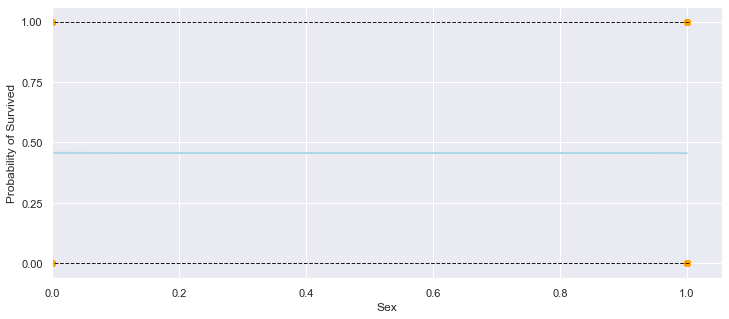

In [78]:
prob = clf_no_sgd.predict_proba(X_Sex_test)

fig, (ax2) = plt.subplots(1, figsize=(12,5))

# Right plot: Logistic Regression
ax2.scatter(X_Sex_train, Y_train, color='orange')
ax2.plot(X_Sex_test, prob[:,1], color='lightblue')

for ax in fig.axes:
    ax.hlines(1, xmin=ax.xaxis.get_data_interval()[0],
              xmax=ax.xaxis.get_data_interval()[1], linestyles='dashed', lw=1)
    ax.hlines(0, xmin=ax.xaxis.get_data_interval()[0],
              xmax=ax.xaxis.get_data_interval()[1], linestyles='dashed', lw=1)
    ax.set_ylabel('Probability of Survived')
    ax.set_xlabel('Sex')
    ax.set_yticks([0, 0.25, 0.5, 0.75, 1.])
    ax.set_xlim(xmin=0)


In [21]:
#0.7655


In [38]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,1
1,1,1,0,38.0,1,0,71.2833,2
2,1,3,0,26.0,0,0,7.9250,1
3,1,1,0,35.0,1,0,53.1000,1
4,0,3,1,35.0,0,0,8.0500,1


In [59]:
X_Age_train=np.array(train['Age']).reshape(-1,1 )
X_Age_test=np.array(test['Age']).reshape(-1,1)


where_are_NaNs = np.isnan(X_Age_test)
X_Age_test[where_are_NaNs] = train['Age'].median()


clf_no_sgd = LogisticRegression(penalty='none', random_state=0)
clf_no_sgd.fit(X_Age_train, Y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='none',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [60]:
print('clf_no_sgd_intercept:',clf_no_sgd.intercept_, 'clf_no_sgd_coef:', clf_no_sgd.coef_)


clf_no_sgd_intercept: [-0.17023225] clf_no_sgd_coef: [[-0.01039636]]


In [62]:
predictions = clf_no_sgd.predict(X_Age_test)

output = pd.DataFrame({ 'PassengerId' : test_id, 'Survived': predictions })
output.to_csv('submission_Age.csv', index=False)


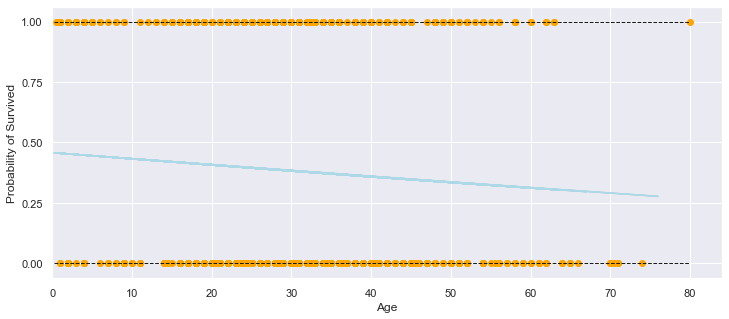

In [64]:
prob = clf_no_sgd.predict_proba(X_Age_test)

fig, (ax2) = plt.subplots(1, figsize=(12,5))

ax2.scatter(X_Age_train, Y_train, color='orange')
ax2.plot(X_Age_test, prob[:,1], color='lightblue')

for ax in fig.axes:
    ax.hlines(1, xmin=ax.xaxis.get_data_interval()[0],
              xmax=ax.xaxis.get_data_interval()[1], linestyles='dashed', lw=1)
    ax.hlines(0, xmin=ax.xaxis.get_data_interval()[0],
              xmax=ax.xaxis.get_data_interval()[1], linestyles='dashed', lw=1)
    ax.set_ylabel('Probability of Survived')
    ax.set_xlabel('Age')
    ax.set_yticks([0, 0.25, 0.5, 0.75, 1.])
    ax.set_xlim(xmin=0)

In [ ]:
#0.62200

In [47]:
X_train2 = train.drop(['Survived','SibSp','Parch','Fare','Embarked'], axis=1)
X_test2= test.drop(['SibSp','Parch','Fare','Embarked'], axis=1)

X_test2['Age'].fillna(train['Age'].median(),inplace=True)
X_test2['Pclass'].fillna(train['Pclass'].median(),inplace=True)

In [48]:

clf_no_sgd = LogisticRegression(penalty='none', random_state=0)
clf_no_sgd.fit(X_train2, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='none',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [49]:
print('clf_no_sgd_intercept:',clf_no_sgd.intercept_, 'clf_no_sgd_coef:', clf_no_sgd.coef_)


clf_no_sgd_intercept: [4.72473881] clf_no_sgd_coef: [[-1.17171914 -2.61227958 -0.03331107]]


In [51]:
predictions = clf_no_sgd.predict(X_test2)

output = pd.DataFrame({ 'PassengerId' : test_id, 'Survived': predictions })
output.to_csv('submission_3.csv', index=False)


In [71]:
#0.75598
Y_train.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

KeyError: "None of [Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked'], dtype='object')] are in the [columns]"